<a href="https://colab.research.google.com/github/mterion/tensorflow-1-public/blob/main/C3/W4/assignment/C3_W4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [2]:
#!pip install tensorflow==2.5.0

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1          # + 1 bec <OOV>

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]   # Convert a line of text into a list of tokens
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]    # Input sequence is now an array

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 94.8MB/s]


In [19]:
print("input_sequences[:,1]", input_sequences[1,:])
print("total_words", total_words)
print("max_sequence_len", max_sequence_len)

input_sequences[:,1] [  0   0   0   0   0   0   0   0  34 417 877]


3211

In [15]:
# Kernel regularizer keeps the weights under control, by applying a penalty on the layer’s kernel (weights), not bias. 
  ## You mainly use it when your network shows an unstable training.
# Bidirectional LSTM is something to try when you have the whole sentence at your disposal since the beginning.

### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1)) # -1 bec we cropped out the last word for labels
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
### END CODE HERE
    
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 100)           321100    
                                                                 
 bidirectional_2 (Bidirectio  (None, 10, 300)          301200    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 10, 300)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 1605)              162105    
                                                                 
 dense_3 (Dense)             (None, 3211)              5156866   
                                                      

In [20]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 16s 10ms/step - loss: 6.9160 - accuracy: 0.0224
Epoch 2/100
484/484 [==============================] - 5s 10ms/step - loss: 6.5014 - accuracy: 0.0230
Epoch 3/100
484/484 [==============================] - 5s 10ms/step - loss: 6.3982 - accuracy: 0.0265
Epoch 4/100
484/484 [==============================] - 5s 9ms/step - loss: 6.2771 - accuracy: 0.0294
Epoch 5/100
484/484 [==============================] - 5s 10ms/step - loss: 6.1911 - accuracy: 0.0338
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1265 - accuracy: 0.0378
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0615 - accuracy: 0.0417
Epoch 8/100
484/484 [==============================] - 5s 10ms/step - loss: 5.9890 - accuracy: 0.0454
Epoch 9/100
484/484 [==============================] - 5s 10ms/step - loss: 5.9078 - accuracy: 0.0499
Epoch 10/100
484/484 [==============================] - 6s 13ms/step - loss: 5.810

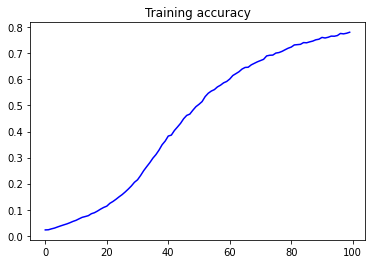

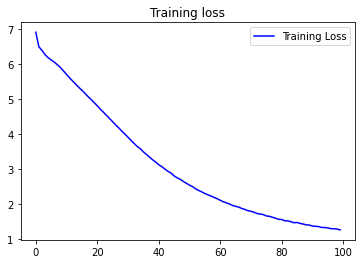

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [23]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	index = np.argmax(model.predict(token_list, verbose=0))
	output_word = tokenizer.index_word[index]
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope them i see it bright crime none shown 'will ' add the time doth go after pleasure set seeming youth assured thee doth stay your way bettering to her gay bear days increase lend desired leave thee now your sight be hide be is so bold foes rare so it bold 'will being words in night up crime crime go pleasure new but bright these growest growest light free prove me your pleasure days dost new back your hand must back his day will glance them more go light prove men respect delight are deceive rehearse invited bear well sight
